In [4]:
import numpy as np
import matplotlib.pyplot as plt

from Environment import Environment
from Learner import Learner
from Solver import Solver

In [8]:
env = Environment()
learner = Learner(env)

solver = Solver(env)
optimal_configuration, optimal_reward = solver.find_optimal()

print("OPTIMAL CONFIGURATION")
print(optimal_configuration)
print("OPTIMAL A-PRIORI REWARD")
print(optimal_reward)

OPTIMAL CONFIGURATION
(1, 0, 1, 2, 3)
OPTIMAL A-PRIORI REWARD
38.89891576673011


In [9]:
runs = 20
T = 20

greedy_results = []
optimal_results = []

In [10]:
for r in range(runs):
    print("\n########## RUN", r+1, "\n")

    greedy_config = learner.greedy_optimization()
    greedy_rounds = []

    optimal_rounds = []

    for i in range(T):
        seed = np.random.randint(1, 2 ** 30)

        greedy_round_data = env.round(greedy_config, seed)
        greedy_rounds.append(greedy_round_data)

        optimal_round_data = env.round(optimal_configuration, seed)
        optimal_rounds.append(optimal_round_data)

    greedy_rewards = []
    optimal_rewards = []

    for i in range(T):
        greedy_rewards.append(greedy_rounds[i].reward)
        optimal_rewards.append(optimal_rounds[i].reward)

    greedy_rewards = np.array(greedy_rewards)
    optimal_rewards = np.array(optimal_rewards)

    print("--------------------GREEDY---------------------")
    print("AVERAGE REWARD:")
    print("\t", np.average(greedy_rewards))
    print("AVERAGE REGRET:")
    print("\t", np.average(optimal_rewards - greedy_rewards))

    greedy_results.append(greedy_rewards)
    optimal_results.append(optimal_rewards)


########## RUN 1 

Best configuration n0:  [0, 0, 0, 0, 0]
Best reward n0:  25.8321 

Testing configuration  [1, 0, 0, 0, 0] ...
Obtained reward:   29.1136
# BEST
Testing configuration  [0, 1, 0, 0, 0] ...
Obtained reward:   21.7695
Testing configuration  [0, 0, 1, 0, 0] ...
Obtained reward:   27.495
Testing configuration  [0, 0, 0, 1, 0] ...
Obtained reward:   28.4082
Testing configuration  [0, 0, 0, 0, 1] ...
Obtained reward:   28.4814

Best configuration n1:  [1, 0, 0, 0, 0]
Best reward n1:  29.1136 

Testing configuration  [2, 0, 0, 0, 0] ...
Obtained reward:   23.0613
Testing configuration  [1, 1, 0, 0, 0] ...
Obtained reward:   25.5714
Testing configuration  [1, 0, 1, 0, 0] ...
Obtained reward:   33.1987
# BEST
Testing configuration  [1, 0, 0, 1, 0] ...
Obtained reward:   29.675
Testing configuration  [1, 0, 0, 0, 1] ...
Obtained reward:   27.2707

Best configuration n2:  [1, 0, 1, 0, 0]
Best reward n2:  33.1987 

Testing configuration  [2, 0, 1, 0, 0] ...
Obtained reward:   27.

In [11]:
greedy_results = np.array(greedy_results)
optimal_results = np.array(optimal_results)

rounds = list(range(T))

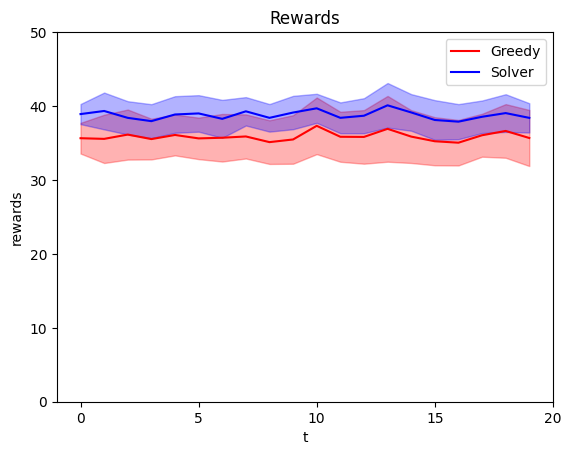

In [25]:
# REWARDS

means = np.average(greedy_results, axis=0)
std = np.std(greedy_results, axis=0)
optimal = np.average(optimal_results, axis=0)
optimal_std = np.std(optimal_results, axis=0)
fig, ax = plt.subplots()
plt.title("Rewards")
plt.xlabel("t")
plt.ylabel("rewards")
plt.xlim(-1, T)
plt.xticks([0, 5, 10, 15, 20])
plt.ylim(0, 50)
ax.plot(means, 'r', label="Greedy")
ax.fill_between(rounds, means-std, means+std, alpha=0.3, color='red')
ax.plot(optimal, 'b', label="Solver")
ax.fill_between(rounds, optimal-optimal_std, optimal+optimal_std, alpha=0.3, color='blue')
plt.legend()

plt.show()

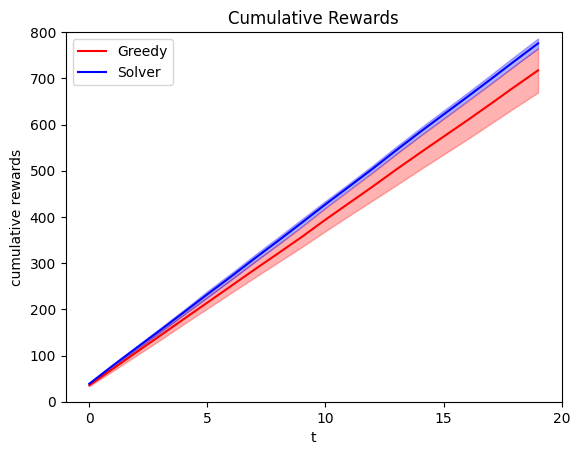

In [26]:
# CUMULATIVE REWARDS

means = np.average(np.cumsum(greedy_results, axis=1), axis=0)
std = np.std(np.cumsum(greedy_results, axis=1), axis=0)
optimal = np.average(np.cumsum(optimal_results, axis=1), axis=0)
optimal_std = np.std(np.cumsum(optimal_results, axis=1), axis=0)
fig, ax = plt.subplots()
plt.title("Cumulative Rewards")
plt.xlabel("t")
plt.ylabel("cumulative rewards")
plt.xlim(-1, T)
plt.xticks([0, 5, 10, 15, 20])
plt.ylim(0, 800)
ax.plot(means, 'r', label="Greedy")
ax.fill_between(rounds, means-std, means+std, alpha=0.3, color='red')
ax.plot(optimal, 'b', label="Solver")
ax.fill_between(rounds, optimal-optimal_std, optimal+optimal_std, alpha=0.3, color='blue')
plt.legend()

plt.show()

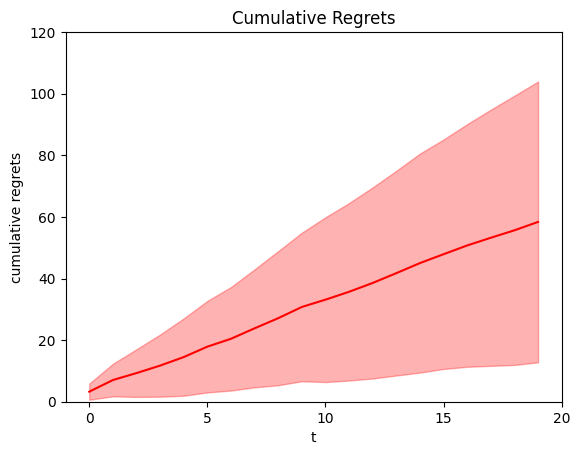

In [24]:
# CUMULATIVE REGRETS

means = np.average(np.cumsum(optimal_results - greedy_results, axis=1), axis=0)
std = np.std(np.cumsum(optimal_results - greedy_results, axis=1), axis=0)
fig, ax = plt.subplots()
plt.title("Cumulative Regrets")
plt.xlabel("t")
plt.ylabel("cumulative regrets")
plt.xlim(-1, T)
plt.xticks([0, 5, 10, 15, 20])
plt.ylim(0, 120)
ax.plot(means, 'r')
ax.fill_between(rounds, means-std, means+std, alpha=0.3, color='red')